<h3>Lets import the necessary modules</h3>

In [1]:
from math import pi,sqrt
from qiskit import QuantumCircuit,Aer,execute
from qiskit.tools.visualization import plot_histogram

<h3>First let's discuss the CNOT gate (Controlled NOT)</h3>
CNOT is a conditional gate which applies X-gate on the <br>target qubit if the control qubit is 
in state 1.In qiskit, we define CNOT as cx(cq,tq) where<br>
<b> cq --> control qubit (first qubit)</b><br>
<b> tq --> target qubit (second qubit)</b><br>
The following is the diagram of cnot gate where q0 is control gate and q1 is target qubit

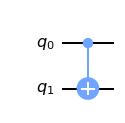

In [2]:
cnot_gate = QuantumCircuit(2)
cnot_gate.cx(0,1)
cnot_gate.draw(output = 'mpl')

Now,let's see what happens when we apply cnot gate to a superposition.


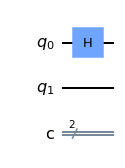

In [3]:
bell = QuantumCircuit(2,2)
bell.h(0)
bell.draw(output = 'mpl')

As discussed earlier,hadamard gate allows us to create a superposition of <br>
state 1 and state 0.Now,let's apply cnot to above circuit

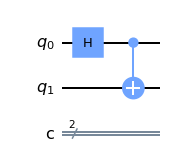

In [4]:
bell.cx(0,1)
bell.draw(output = 'mpl')

Now,measuring the result and storing them in classical bit 0 and 1 we get the circuit diagram as

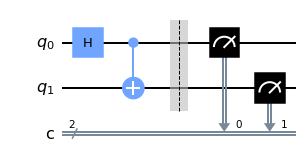

In [5]:
bell.barrier()
bell.measure([0,1],[0,1])
bell.draw(output = 'mpl')

Let me write the whole code in one block and <br>
use quasm simulator to simulate the result of the circuit <br>
and use plot_histogram to plot the result of simulation

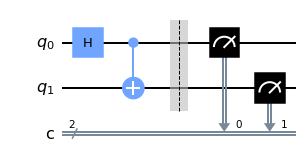

In [6]:
bell = QuantumCircuit(2,2)
bell.h(0)
bell.cx(0,1)
bell.barrier()
bell.measure([0,1],[0,1])
bell.draw(output = 'mpl')

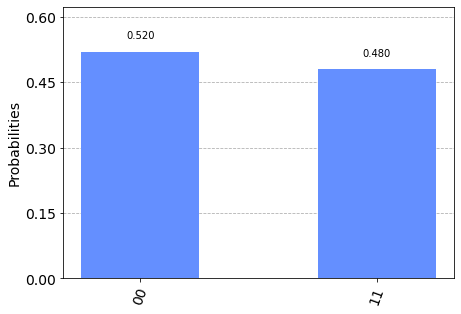

In [7]:
backend = Aer.get_backend('qasm_simulator')
result = execute(bell,backend = backend).result()
plot_histogram(result.get_counts())




The interesting thing about this bell state is that there is <b> 50 % </b> chance of being measured in state 00 and <b> 50 % </b> chance of being measured in state 11 but <b> 0 % </b> chance of being measured in state 01 or 11
which is pretty obvious after looking at the plot.


Let's now use real qunatum computer and see what happens

In [8]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

IBMQ.load_account()

provider = IBMQ.get_provider(hub = 'ibm-q')


backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))

print(f'Least Busy = {backend}')


job = execute(bell,backend = backend)



Least Busy = ibmqx2


In [9]:
job_monitor(job)

Job Status: job has successfully run


Let's visualize the result

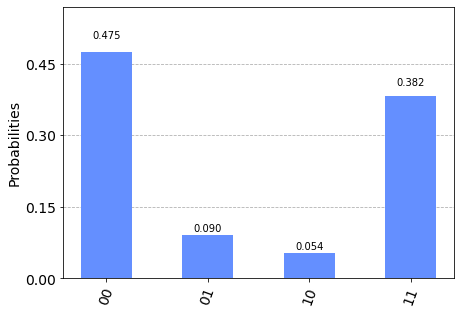

In [10]:
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

As seen in the above plot , there are few chances where we get state 01 and state 10.<br> 
This is because of the error in the quantum device.